# The Birthday Paradox 🎂

The birthday paradox, also known as the birthday problem, is a counterintuitive phenomenon in probability theory that deals with the likelihood of shared birthdays within a group of people. Despite the name "paradox," it's not actually a true paradox, but rather a surprising result that often catches people off guard.

The birthday paradox can be stated as follows: In a group of just 23 people as given below, there is a greater than 50% chance that at least two of them share the same birthday. 

🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️🧍‍♂️

At first glance, this might seem unlikely, given that there are 365 days in a year (ignoring leap years for simplicity). Intuitively, we might think that a group of 23 people is much smaller than the total number of days in a year, so the chances of any two people sharing a birthday should be quite low. However, the paradox arises from the fact that we are not looking for any specific pair of people to share a birthday. Instead, we are looking for any pair within the group to share a birthday. As the group size grows, the number of potential pairs also grows rapidly, increasing the chances of finding at least one pair with a shared birthday.

If you're like "what are you talking about?", let's look at this in more detail.

In [26]:
import random
from tqdm.notebook import tqdm


def has_shared_birthday(num_people):
    birthdays = [random.randint(1, 365) for _ in range(num_people)]
    return len(birthdays) != len(set(birthdays))


def simulate_birthday_paradox(num_simulations, num_people):
    shared_birthday_count = 0

    for _ in range(num_simulations):
        if has_shared_birthday(num_people):
            shared_birthday_count += 1

    probability = shared_birthday_count / num_simulations
    return probability

Let's first start simple and calculate the probability of two people having the same birthday in a room of 23 people.

In [34]:
num_people = 23
num_days = 365

probability = simulate_birthday_paradox(num_simulations, num_people)

print(
    f"Probability of two people having the same birthday in a room of {num_people} people is {probability:.2f}"
)

Probability of two people having the same birthday in a room of 23 people is 0.50


Now, we can generaltize the problem to find the probability of two people having the same birthday in a group of n people. This will give us how the probability changes with the increase in the number of people in the group.

In [35]:
num_simulations = 10000
probabilities = []

num_people_range = range(1, 101)

for num_people in tqdm(num_people_range):
    probability = simulate_birthday_paradox(num_simulations, num_people)
    probabilities.append(probability)

  0%|          | 0/100 [00:00<?, ?it/s]

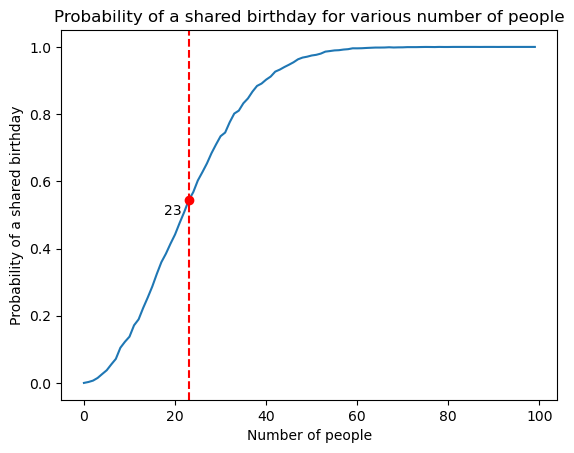

In [36]:
import matplotlib.pyplot as plt


plt.plot(probabilities)
plt.xlabel("Number of people")
plt.ylabel("Probability of a shared birthday")
plt.title("Probability of a shared birthday for various number of people")

pos = next(x for x, val in enumerate(probabilities) if val > 0.5) + 1
plt.axvline(x=pos, color="red", linestyle="--")
plt.text(pos - 5.5, 0.5, str(pos), color="black")
pos_y = probabilities[pos]
plt.plot(pos, pos_y, "o", color="red")
plt.show()

Exploring the intricacies of the birthday paradox using Python reveals a delightful twist: the surprise of shared birthdays seems almost ordinary, especially when contrasted with the extraordinary coincidence that today is my birthday.. (not kidding)